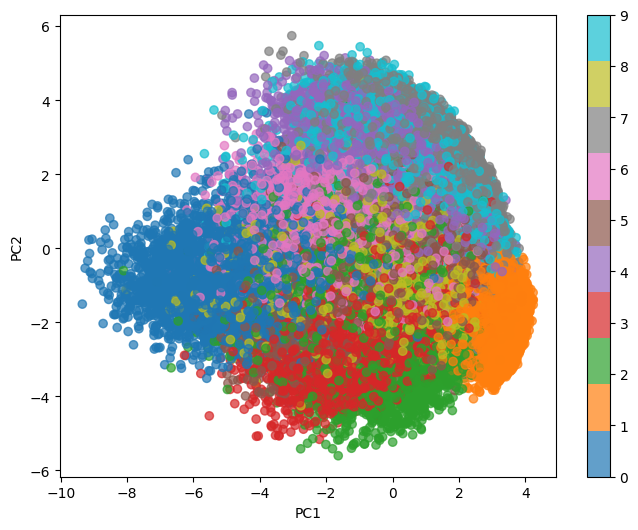

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist, labels = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
mnist = mnist.astype('float32') / 255.0
labels = labels.astype(int)
num_pcs = 20

def pca(X, num_components):
    X_meaned = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    eigenvector_subset = sorted_eigenvectors[:, :num_components]
    X_reduced = np.dot(X_meaned, eigenvector_subset)
    return X_reduced, eigenvector_subset

mnist_reduced, eigenvector_subset = pca(mnist, num_pcs)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(mnist_reduced[:, 0], mnist_reduced[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

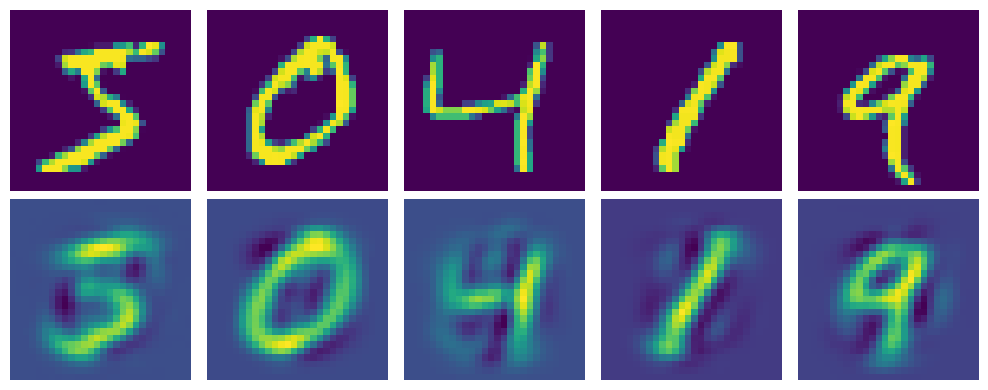

In [2]:

mnist_decompressed = np.dot(mnist_reduced, eigenvector_subset.T) + np.mean(mnist, axis=0)

def visualize_decompression(original, decompressed, img_shape, num_images=5, title=""):
    original = original.reshape(-1, *img_shape)
    decompressed = decompressed.reshape(-1, *img_shape)

    plt.figure(figsize=(10, 4))

    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i])
        plt.axis('off')

        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(decompressed[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()


visualize_decompression(mnist[:5], mnist_decompressed[:5], img_shape=(28, 28), title="MNIST")